# Lecture 8: Data Visualization with Matplotlib
## F&W ECOL 458: Environmental Data Science


**Learning Objectives:**
- Understand the structure of Matplotlib figures
- Create line plots, scatter plots, and bar charts
- Customize plot appearance (colors, labels, legends)
- Build effective visualizations for environmental data

**Environment:** Google Colab

---

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Why Visualize Data?

Visualization helps us:
- **Explore** patterns and relationships in data
- **Communicate** findings to others
- **Detect** outliers and data quality issues

Let's see an example where visualization reveals something statistics alone cannot.

In [3]:
# Anscombe's quartet - four datasets with identical summary statistics
# but very different patterns

anscombe = {
    'I':   {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
            'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]},
    'II':  {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
            'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]},
    'III': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
            'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]},
    'IV':  {'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
            'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]}
}

# All four have nearly identical: mean(x)=9, mean(y)≈7.5, std, correlation≈0.82
print("All four datasets have nearly identical statistics:")
for name, data in anscombe.items():
    print(f"  {name}: mean_x={np.mean(data['x']):.1f}, mean_y={np.mean(data['y']):.2f}, r={np.corrcoef(data['x'], data['y'])[0,1]:.2f}")

All four datasets have nearly identical statistics:
  I: mean_x=9.0, mean_y=7.50, r=0.82
  II: mean_x=9.0, mean_y=7.50, r=0.82
  III: mean_x=9.0, mean_y=7.50, r=0.82
  IV: mean_x=9.0, mean_y=7.50, r=0.82


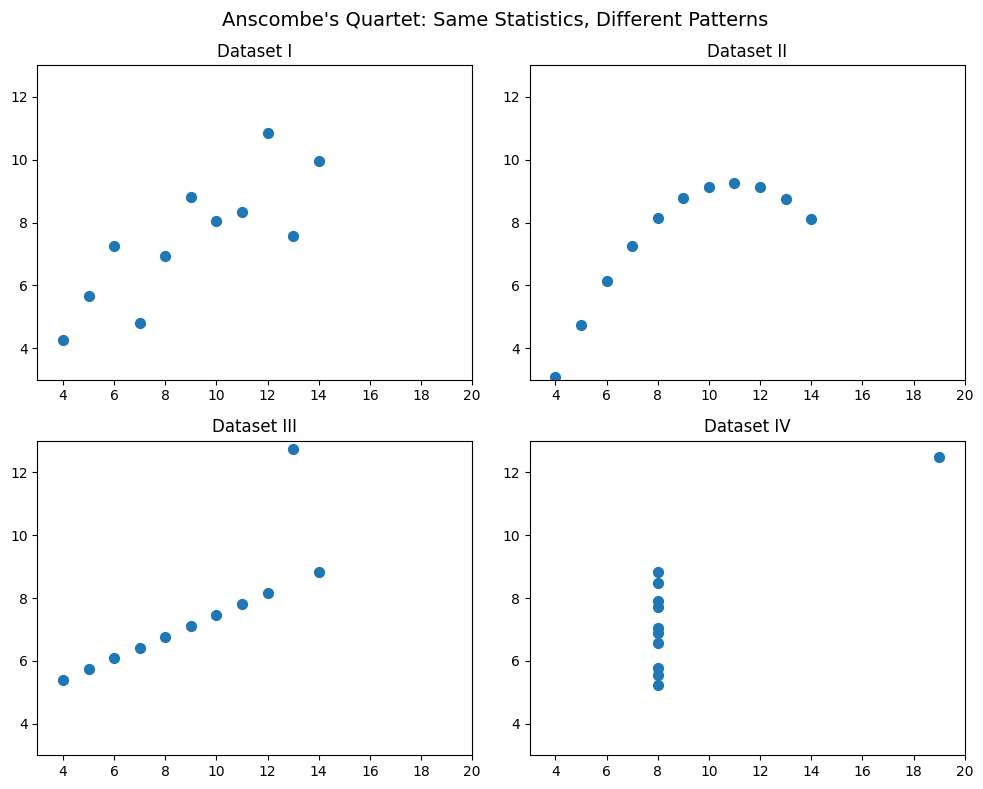


→ Always visualize your data!


In [4]:
# But when we plot them...
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, (name, data) in zip(axes.flat, anscombe.items()):
    ax.scatter(data['x'], data['y'], s=50)
    ax.set_title(f'Dataset {name}')
    ax.set_xlim(3, 20)
    ax.set_ylim(3, 13)

plt.suptitle("Anscombe's Quartet: Same Statistics, Different Patterns", fontsize=14)
plt.tight_layout()
plt.show()

print("\n→ Always visualize your data!")

---
## 2. Matplotlib Basics

### 2.1 The Figure and Axes

Matplotlib has two main concepts:
- **Figure**: The entire canvas (window)
- **Axes**: A single plot area within the figure

Think of it like a picture frame (Figure) that can hold one or more photos (Axes).

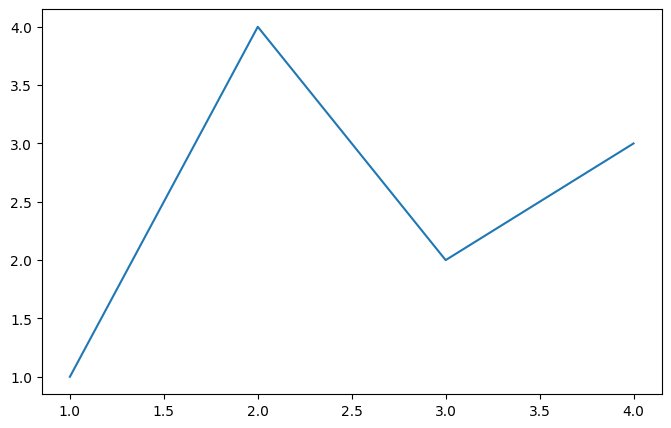

In [5]:
# The recommended way: create figure and axes together
fig, ax = plt.subplots(figsize=(8, 5))  # figsize=(width, height) in inches

# Now use 'ax' to plot
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

plt.show()

### 2.2 Essential Plot Elements

Every good plot needs:
- **Data**: The actual values being plotted
- **Axis labels**: What each axis represents (with units!)
- **Title**: What the plot shows
- **Legend** (if multiple series): What each line/point represents

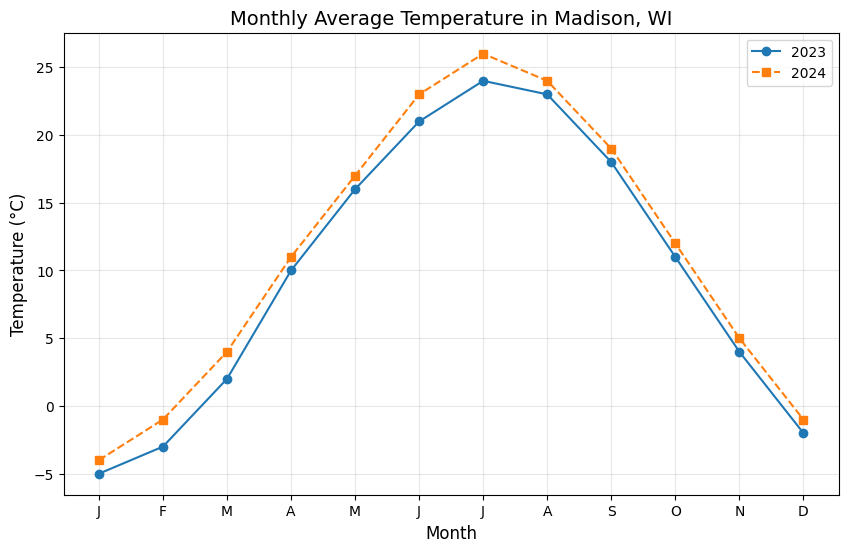

In [9]:
# A complete, well-labeled plot
fig, ax = plt.subplots(figsize=(10, 6))

# Sample data: monthly average temperatures
months = np.arange(1, 13)
temp_2023 = [-5, -3, 2, 10, 16, 21, 24, 23, 18, 11, 4, -2]
temp_2024 = [-4, -1, 4, 11, 17, 23, 26, 24, 19, 12, 5, -1]

# Plot data
ax.plot(months, temp_2023, 'o-', label='2023')
ax.plot(months, temp_2024, 's--', label='2024')

# Labels and title
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Monthly Average Temperature in Madison, WI', fontsize=14)

# Legend
ax.legend()

# Make x-axis show month names
ax.set_xticks(months)
ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])

# Add grid for readability
ax.grid(True, alpha=0.3)

plt.show()

---
## 3. Prepare Sample Datasets

We'll use these environmental datasets throughout the class.

In [10]:
# Dataset 1: Daily stream monitoring data
np.random.seed(42)

dates = pd.date_range('2024-01-01', '2024-12-31', freq='D')
n_days = len(dates)
day_of_year = np.arange(n_days)

# Seasonal temperature pattern
seasonal_temp = 12 + 10 * np.sin(2 * np.pi * (day_of_year - 80) / 365)

stream_data = pd.DataFrame({
    'date': dates,
    'temperature_c': seasonal_temp + np.random.normal(0, 2, n_days),
    'discharge_cms': np.random.exponential(2, n_days) + 0.5
})

print("Stream data:")
stream_data.head()

Stream data:


,date,temperature_c,discharge_cms
0,2024-01-01,3.180364,1.006164
1,2024-01-02,1.944988,7.105740
2,2024-01-03,3.554373,0.524458
3,2024-01-04,5.345420,7.505054
4,2024-01-05,1.874294,0.588238


In [11]:
# Dataset 2: Tree inventory
np.random.seed(123)
n_trees = 100

tree_data = pd.DataFrame({
    'species': np.random.choice(['Oak', 'Maple', 'Pine', 'Birch'], n_trees,
                                 p=[0.30, 0.35, 0.25, 0.10]),
    'dbh_cm': np.random.uniform(10, 60, n_trees)
})
tree_data['height_m'] = 5 + 0.4 * tree_data['dbh_cm'] + np.random.normal(0, 3, n_trees)
tree_data['height_m'] = tree_data['height_m'].clip(lower=3)

print("\nTree inventory data:")
tree_data.head()


Tree inventory data:


,species,dbh_cm,height_m
0,Pine,35.656408,17.040122
1,Oak,43.331228,22.551213
2,Oak,15.295424,12.327428
3,Maple,16.544748,16.033687
4,Pine,26.099030,16.361765


In [12]:
# Dataset 3: Land cover percentages
land_cover = pd.DataFrame({
    'region': ['North', 'South', 'East', 'West', 'Central'],
    'forest': [45, 32, 58, 41, 28],
    'agriculture': [30, 45, 22, 35, 52],
    'urban': [15, 18, 12, 16, 15],
    'water': [10, 5, 8, 8, 5]
})

print("\nLand cover data:")
land_cover


Land cover data:


,region,forest,agriculture,urban,water
0,North,45,30,15,10
1,South,32,45,18,5
2,East,58,22,12,8
3,West,41,35,16,8
4,Central,28,52,15,5


---
## 4. Line Plots

**Best for:** Time series, continuous trends, showing change over a sequence

### 4.1 Basic Line Plot

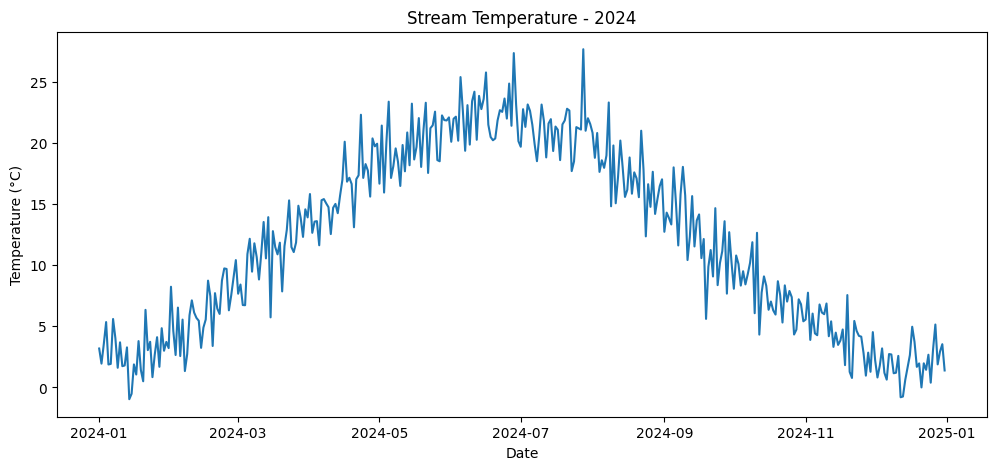

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(stream_data['date'], stream_data['temperature_c'])

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Stream Temperature - 2024')

plt.show()

### 4.2 Line Styles and Colors

Common format string: `'color + marker + linestyle'`

| Colors | Markers | Line styles |
|--------|---------|-------------|
| `b` blue | `o` circle | `-` solid |
| `g` green | `s` square | `--` dashed |
| `r` red | `^` triangle | `:` dotted |
| `k` black | `d` diamond | `-.` dash-dot |

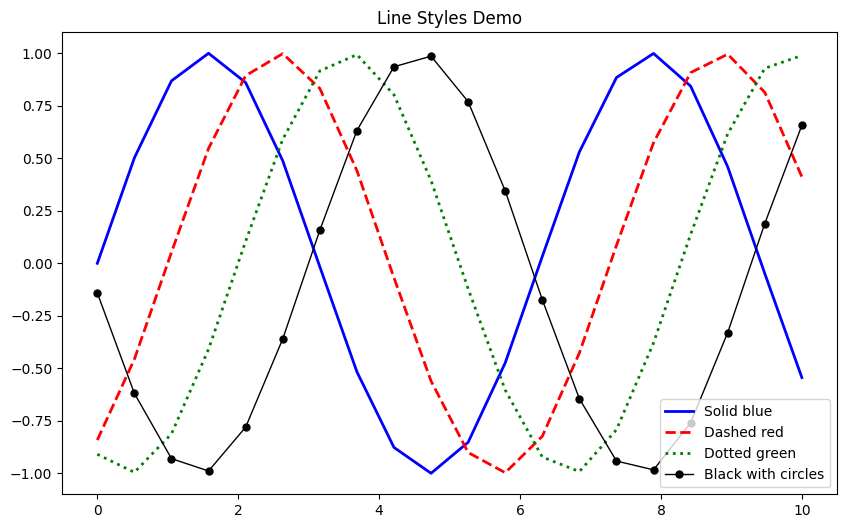

In [14]:
# Demonstrate different styles
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(0, 10, 20)

ax.plot(x, np.sin(x), 'b-', linewidth=2, label='Solid blue')
ax.plot(x, np.sin(x - 1), 'r--', linewidth=2, label='Dashed red')
ax.plot(x, np.sin(x - 2), 'g:', linewidth=2, label='Dotted green')
ax.plot(x, np.sin(x - 3), 'ko-', linewidth=1, markersize=5, label='Black with circles')

ax.legend()
ax.set_title('Line Styles Demo')

plt.show()

### 4.3 Adding Reference Lines

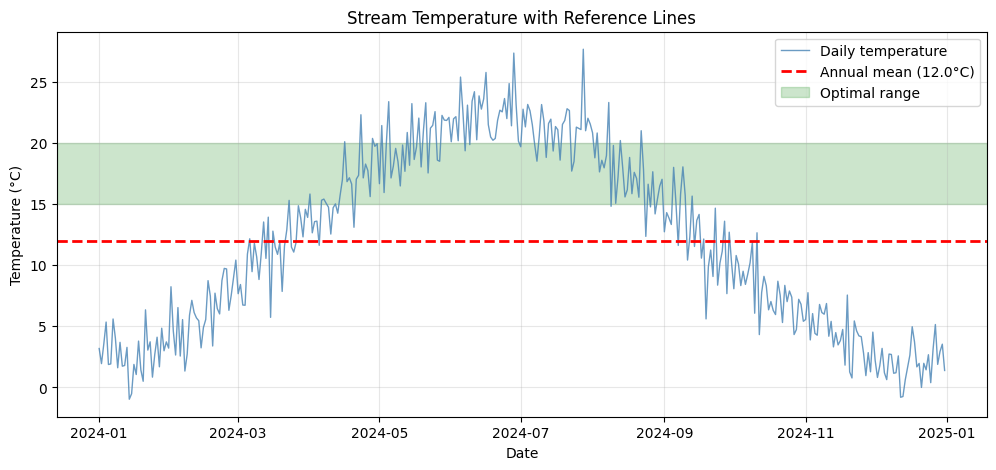

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))

# Plot main data
ax.plot(stream_data['date'], stream_data['temperature_c'],
        color='steelblue', linewidth=1, alpha=0.8, label='Daily temperature')

# Add horizontal reference lines
mean_temp = stream_data['temperature_c'].mean()
ax.axhline(y=mean_temp, color='red', linestyle='--', linewidth=2,
           label=f'Annual mean ({mean_temp:.1f}°C)')

# Add a shaded region (e.g., optimal temperature range)
ax.axhspan(15, 20, color='green', alpha=0.2, label='Optimal range')

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Stream Temperature with Reference Lines')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.show()

---
## 5. Scatter Plots

**Best for:** Showing relationships between two continuous variables

### 5.1 Basic Scatter Plot

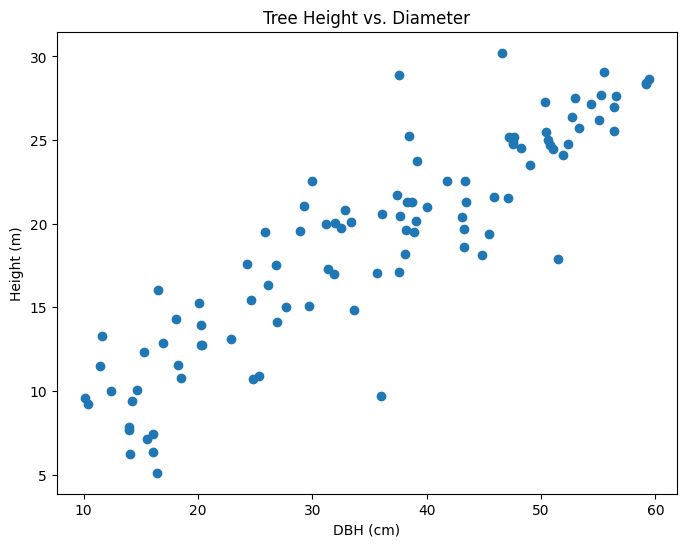

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(tree_data['dbh_cm'], tree_data['height_m'])

ax.set_xlabel('DBH (cm)')
ax.set_ylabel('Height (m)')
ax.set_title('Tree Height vs. Diameter')

plt.show()

### 5.2 Customizing Scatter Plots

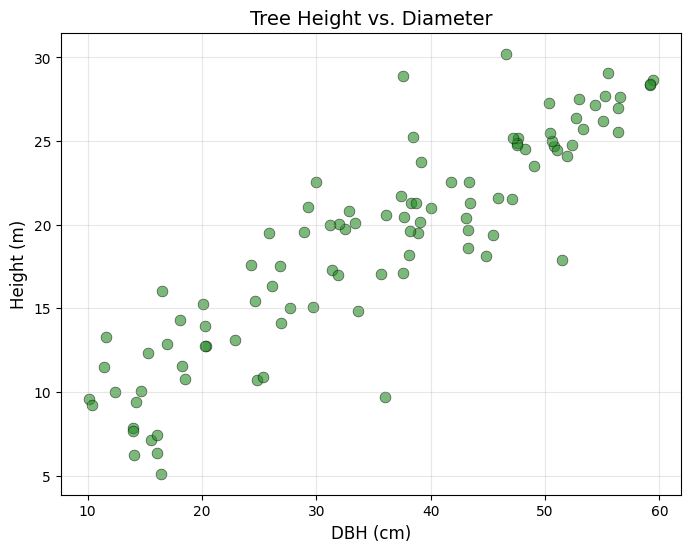

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(tree_data['dbh_cm'], tree_data['height_m'],
           s=60,               # marker size
           c='forestgreen',    # color
           alpha=0.6,          # transparency
           edgecolors='black', # edge color
           linewidths=0.5)     # edge width

ax.set_xlabel('DBH (cm)', fontsize=12)
ax.set_ylabel('Height (m)', fontsize=12)
ax.set_title('Tree Height vs. Diameter', fontsize=14)
ax.grid(True, alpha=0.3)

plt.show()

### 5.3 Color by Category

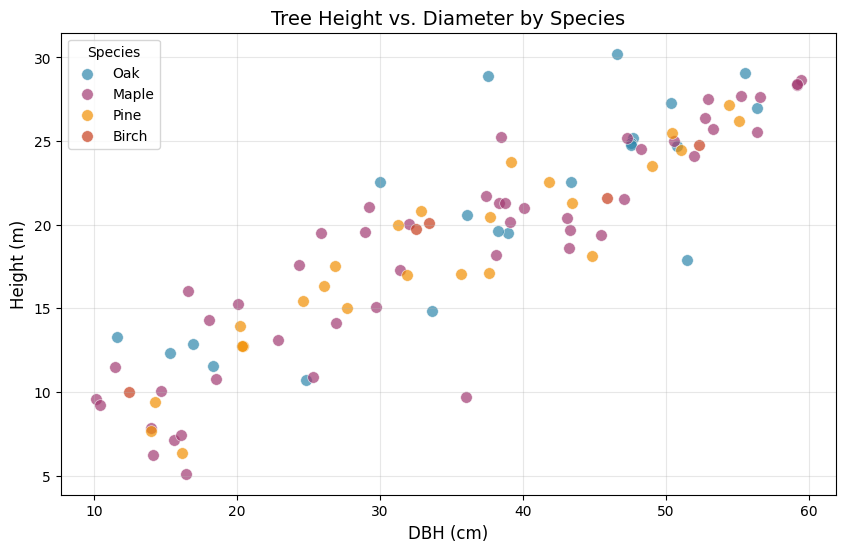

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define a color for each species
colors = {'Oak': '#2E86AB', 'Maple': '#A23B72', 'Pine': '#F18F01', 'Birch': '#C73E1D'}

# Plot each species separately to create a legend
for species in colors:
    subset = tree_data[tree_data['species'] == species]
    ax.scatter(subset['dbh_cm'], subset['height_m'],
               s=70, c=colors[species], label=species,
               alpha=0.7, edgecolors='white', linewidths=0.5)

ax.set_xlabel('DBH (cm)', fontsize=12)
ax.set_ylabel('Height (m)', fontsize=12)
ax.set_title('Tree Height vs. Diameter by Species', fontsize=14)
ax.legend(title='Species')
ax.grid(True, alpha=0.3)

plt.show()

### 5.4 Color by Continuous Variable (Colorbar)

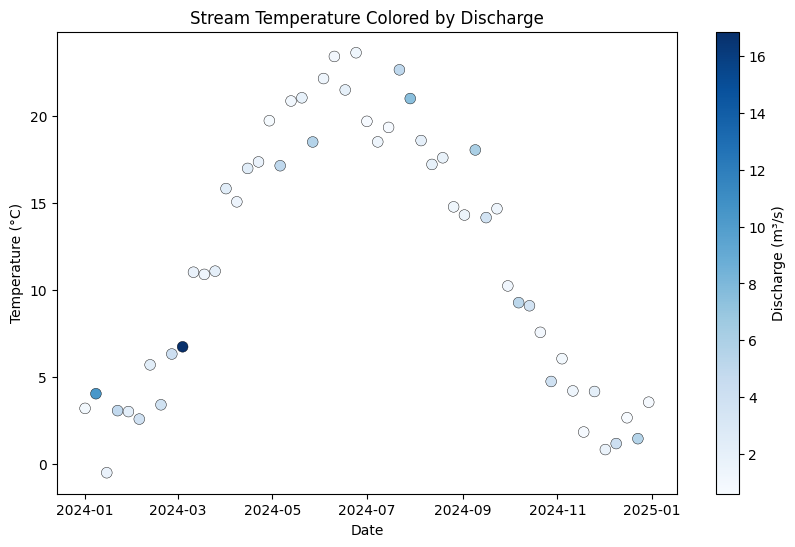

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

# Use weekly data for clearer visualization
weekly = stream_data.iloc[::7]  # Every 7th row

scatter = ax.scatter(weekly['date'], weekly['temperature_c'],
                     c=weekly['discharge_cms'],  # Color by discharge
                     s=60,
                     cmap='Blues',  # Colormap
                     edgecolors='black',
                     linewidths=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Discharge (m³/s)')

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Stream Temperature Colored by Discharge')

plt.show()

---
## 6. Bar Charts

**Best for:** Comparing quantities across discrete categories

### 6.1 Basic Bar Chart

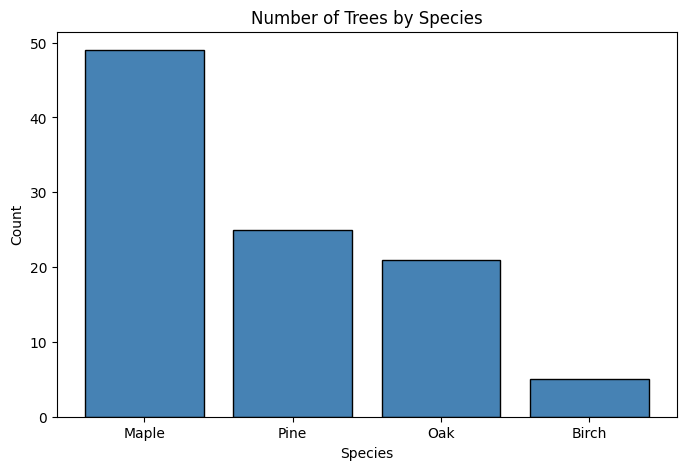

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))

species_counts = tree_data['species'].value_counts()

ax.bar(species_counts.index, species_counts.values, color='steelblue', edgecolor='black')

ax.set_xlabel('Species')
ax.set_ylabel('Count')
ax.set_title('Number of Trees by Species')

plt.show()

### 6.2 Adding Value Labels

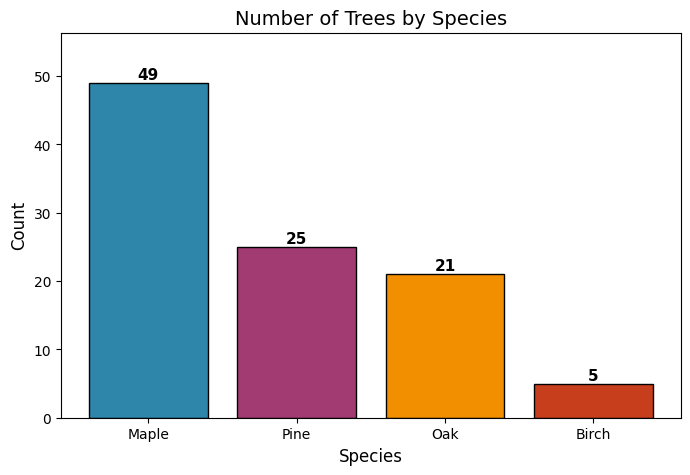

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))

species_counts = tree_data['species'].value_counts()
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

bars = ax.bar(species_counts.index, species_counts.values,
              color=colors, edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Species', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Number of Trees by Species', fontsize=14)
ax.set_ylim(0, species_counts.max() * 1.15)  # Add space for labels

plt.show()

### 6.3 Grouped Bar Chart

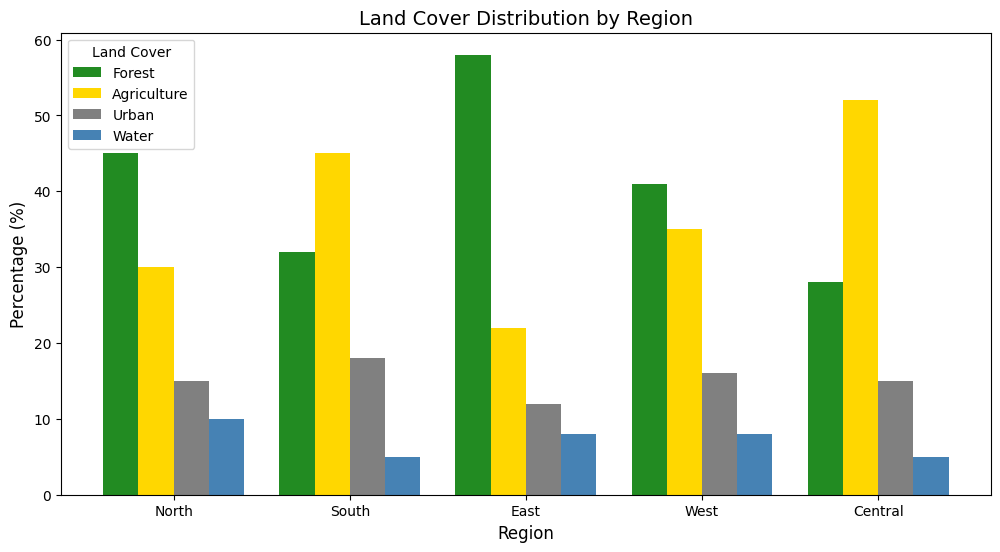

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

regions = land_cover['region']
x = np.arange(len(regions))
width = 0.2

ax.bar(x - 1.5*width, land_cover['forest'], width, label='Forest', color='forestgreen')
ax.bar(x - 0.5*width, land_cover['agriculture'], width, label='Agriculture', color='gold')
ax.bar(x + 0.5*width, land_cover['urban'], width, label='Urban', color='gray')
ax.bar(x + 1.5*width, land_cover['water'], width, label='Water', color='steelblue')

ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Land Cover Distribution by Region', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend(title='Land Cover')

plt.show()

### 6.4 Horizontal Bar Chart

Better when category names are long.

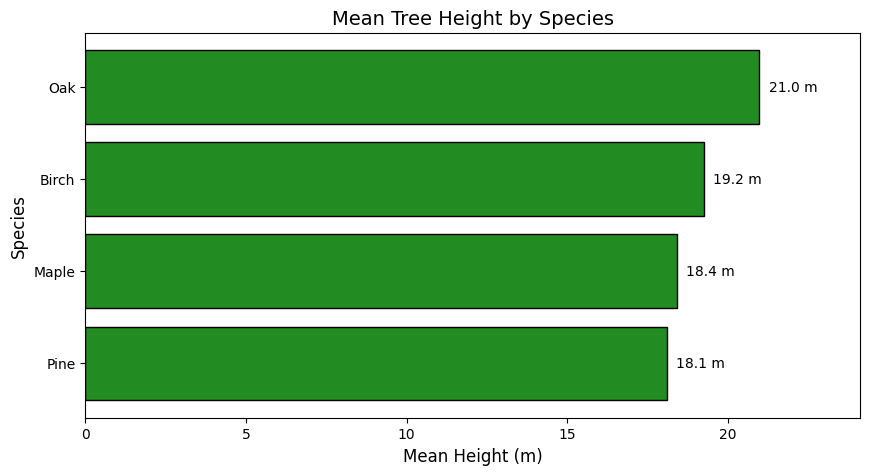

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

# Mean height by species
mean_height = tree_data.groupby('species')['height_m'].mean().sort_values()

ax.barh(mean_height.index, mean_height.values, color='forestgreen', edgecolor='black')

# Add value labels
for i, (species, height) in enumerate(mean_height.items()):
    ax.text(height + 0.3, i, f'{height:.1f} m', va='center')

ax.set_xlabel('Mean Height (m)', fontsize=12)
ax.set_ylabel('Species', fontsize=12)
ax.set_title('Mean Tree Height by Species', fontsize=14)
ax.set_xlim(0, mean_height.max() * 1.15)

plt.show()

---
## 7. Quick Exercise

Using the `stream_data` DataFrame, create a figure that shows:

1. A line plot of **discharge** over time (not temperature)
2. Add a horizontal line showing the mean discharge
3. Include proper axis labels, title, and legend
4. Use a color other than blue

In [ ]:
# Your code here



---
## Summary

| Plot Type | Best For | Function |
|-----------|----------|----------|
| Line plot | Time series, trends | `ax.plot()` |
| Scatter plot | Relationships between variables | `ax.scatter()` |
| Bar chart | Comparing categories | `ax.bar()`, `ax.barh()` |

**Essential elements for every plot:**
- Axis labels with units
- Descriptive title
- Legend (when showing multiple series)
- Appropriate colors and styling

**Next class:** Histograms, subplots, Seaborn, and saving figures

---
## Solution

In [ ]:
# Exercise Solution
fig, ax = plt.subplots(figsize=(12, 5))

# Plot discharge time series
ax.plot(stream_data['date'], stream_data['discharge_cms'],
        color='darkorange', linewidth=0.8, alpha=0.8, label='Daily discharge')

# Add mean line
mean_discharge = stream_data['discharge_cms'].mean()
ax.axhline(y=mean_discharge, color='darkred', linestyle='--', linewidth=2,
           label=f'Mean ({mean_discharge:.2f} m³/s)')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Discharge (m³/s)', fontsize=12)
ax.set_title('Stream Discharge - 2024', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.show()